# distributionViz
A notebook to visualize differences in distributions of obs from Landsat and Sentinel 2

## Primary POCs

Ian Housman- ian.housman@usda.gov

Robert Chastain- robert.chastain@usda.gov


In [1]:
import pandas as pd
import matplotlib,os,sys,glob
import numpy as np
import matplotlib.pyplot as plt
print('done')

done


In [2]:
#Set up two sets of csv tables
#These are assumed to be from geeViz's pheenoViz tool

#Specify a dictionary of folders containing tables for each histogram
#No limit on how many different types can be specified
# folders_dict= {'Clean':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_clean_lake_combo_160_280_32\tables',
#             ],
#                'Algal Bloom':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_dirty_big_sandy_160_280_32\tables',
#                        r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_dirty_keyhole_160_280_32\tables'],
              
#                'Turbid':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_murky_lake_combo_160_280_32\tables',
#                        r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_murky_lake_combo2_160_280\tables']
#               }

folder_dict = {'WY Turbid':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\turbid_WY_S2_16\tables'],
              'WY Clean':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\clean_WY_S2\tables'],
              'WY Dirty':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\dirty_WY_S2\tables']}

#Specify which bands to use  
#These bands need to be available in the specified tables folders above
whichBands = ['NDCI','NDGI']              

#Provide a color for each type specified above
colors_dict = {'WY Clean':'#0000FF','WY Dirty':'#00FF00','WY Turbid':'#FFFF00'}

#Provide an output folder for histograms
output_dir = r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\distributionViz'

#Provide a name for the run for the histograms
run_name = 'WY Clean-Dirty-Turbid 160-280'

#Specify number of bins in histogram
nBins = 100

#######################################################
if not os.path.exists(output_dir):os.makedirs(output_dir)
print(folder_dict)

{'WY Turbid': ['Q:\\Algal_detection_GEE_work\\Viz_Outputs_RAC\\partial_year_data_runs\\Wyoming\\turbid_WY_S2_16\\tables'], 'WY Clean': ['Q:\\Algal_detection_GEE_work\\Viz_Outputs_RAC\\partial_year_data_runs\\Wyoming\\clean_WY_S2\\tables'], 'WY Dirty': ['Q:\\Algal_detection_GEE_work\\Viz_Outputs_RAC\\partial_year_data_runs\\Wyoming\\dirty_WY_S2\\tables']}


{'WY Turbid': ['Q:\\Algal_detection_GEE_work\\Viz_Outputs_RAC\\partial_year_data_runs\\Wyoming\\turbid_WY_S2_16\\tables'], 'WY Clean': ['Q:\\Algal_detection_GEE_work\\Viz_Outputs_RAC\\partial_year_data_runs\\Wyoming\\clean_WY_S2\\tables'], 'WY Dirty': ['Q:\\Algal_detection_GEE_work\\Viz_Outputs_RAC\\partial_year_data_runs\\Wyoming\\dirty_WY_S2\\tables']}
Reading in tables for: NDCI WY Turbid
Reading in tables for: NDCI WY Clean
Reading in tables for: NDCI WY Dirty
Reading in tables for: NDGI WY Turbid
Reading in tables for: NDGI WY Clean
Reading in tables for: NDGI WY Dirty
{'NDCI': {'WY Turbid': array([ 0.00106592, -0.12399078, -0.11549757, ..., -0.05979509,
       -0.05818344, -0.02691036]), 'WY Clean': array([-0.05070877, -0.02687727, -0.02585443, ..., -0.05571374,
       -0.04709412, -0.03728258]), 'WY Dirty': array([-0.0938248 ,  0.01177136, -0.0873826 , ..., -0.09112929,
       -0.07314312, -0.03846621])}, 'NDGI': {'WY Turbid': array([-0.10387303, -0.10642839, -0.10852779, ...,  

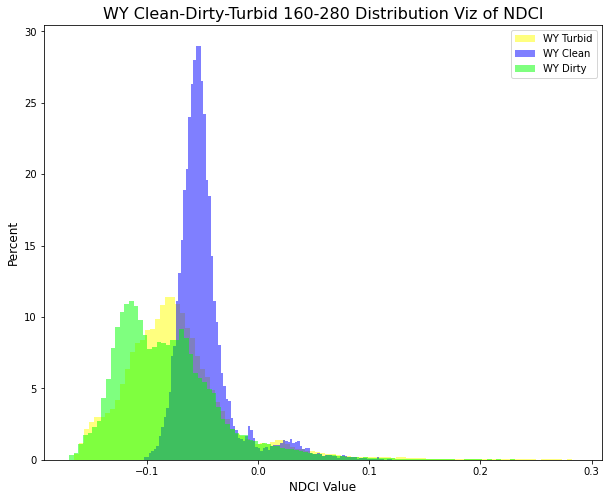

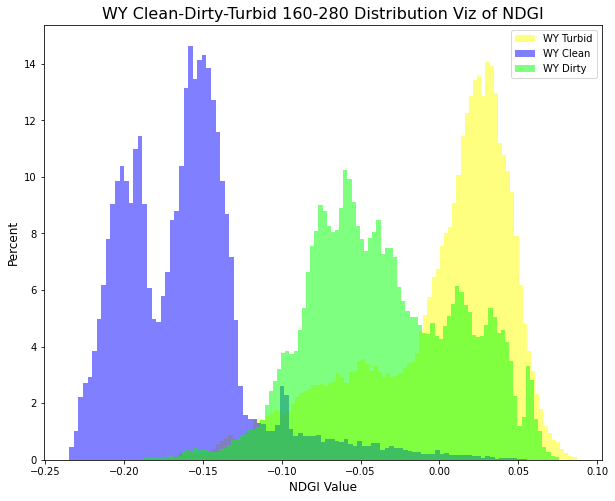

In [3]:
def getHistograms(folder_dict,whichBands,colors_dict,output_dir,run_name,nBins=100):
    #Read in tables
    tables = {}
    #Iterate across each band
    for band in whichBands:
        band_tables = {}
        #Iterate across each type
        for key in folder_dict.keys():
            print('Reading in tables for: {} {}'.format(band,key))
            folders = folder_dict[key]
            li = []
            #Get the csvs and read in valid values into a single long list
            for folder in folders:
                csvs = glob.glob(os.path.join(folder,'*{}.csv'.format(band)))
                for csv in csvs:
#                     print(csv)
                    df = pd.read_csv(csv, index_col=None, header=0).to_numpy().flatten()
                    df = df[~np.isnan(df)]

                    li.append(df)

            li = np.concatenate(li)
            #Get rid of extreme outliers
            min,max = np.percentile(li,[0.05,99.95])
            li = li[(li > min) & (li < max)]#np.clip(li,min,max)

            band_tables[key] = li

        tables[band] = band_tables
    print(tables)
    #Make histograms
    for band in whichBands:
        plt.figure(figsize=(10,8))

        tables_band = tables[band]
        for key in tables_band.keys():
            plt.hist(tables_band[key], bins=nBins, alpha=0.5, density=True,label=key,color = colors_dict[key],stacked=True)
        plt.xlabel("{} Value".format(band), size=12)
        plt.ylabel("Percent", size=12)
        plt.title("{} Distribution Viz of {}".format(run_name,band), size=16)
        plt.legend(loc='upper right')
        plt.savefig(os.path.join(output_dir,'{}_{}.png'.format(run_name,band)))
#############################################################
print(folder_dict)
getHistograms(folder_dict,whichBands,colors_dict,output_dir,run_name,nBins)